In [222]:

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
import pycodamath as coda
from pycodamath import plot
import seaborn as sns
import ternary
import plotly.graph_objects as go
from skbio.stats.composition import closure

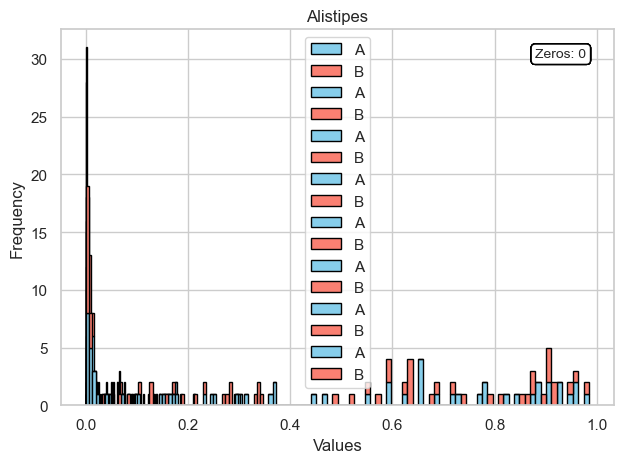

In [234]:
df = pd.read_csv("4-gut_microbiota_ASD_children.csv", index_col=0)

for column in df.select_dtypes(include=["number"]).columns:
    data = df[column].div(df.sum(axis=1), axis=0)

    a_values = data[data.index.str.startswith("A")]
    b_values = data[data.index.str.startswith("B")]


    plt.hist([a_values, b_values], bins=60, label=['A', 'B'], stacked=True,
             color=['skyblue', 'salmon'], edgecolor='black')

    num_zeros = (data == 0).sum()
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(column)
    plt.legend()

    # Text box with number of zeros
    plt.text(0.95, 0.95, f'Zeros: {num_zeros}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.tight_layout()


In [235]:
gm = ss.mstats.gmean(df)
gm = 100/np.sum(gm) * gm
print(gm)

[ 0.          0.          0.          0.38509631  0.         94.24918896
  1.86080811  3.50490663]


In [207]:
import scipy.special as sp

def aitchison_mean(x, alpha):
    ''' Return the Aitchison mean point estimate '''
    return np.exp(sp.digamma(alpha+x))

# Bayesian replacement using alpha = 0.5
bayesian = []
for sample in df.index:
    bayesian.append(aitchison_mean(df.loc[sample], 0.5))

bayesian = pd.DataFrame(bayesian, index=df.index, columns=df.columns)
data_no_z = bayesian


In [133]:
# Non parametric replacement of zeroes - Sum stays the same but distorts cov.matrix

#Provotella replace 0 with 0.5
data_no_z = []
for sample in df.index:
    eq4d1 = [0.5 if i == 0. else i *
             (1-1./20 * 0.5*np.count_nonzero(df.loc[sample] == 0)) 
             for i in df.loc[sample]]
    data_no_z.append(eq4d1)
    
data_no_z = pd.DataFrame(data_no_z, index=df.index, columns=df.columns)
data_no_z


,Prevotella,Clostridium,Shigella,Klebsiella,Coprobacillus,Faecalibacterium,Butyricimonas,Alistipes
A3,7.800,0.500,22.425,66.300,327.600,4863.300,62.400,14.625
A5,11.700,0.975,24.375,7.800,0.500,4933.500,1350.375,19.500
A6,3.900,0.500,14.625,83.850,0.975,2832.375,706.875,704.925
A9,9.000,737.000,12.000,59.000,103.000,5745.000,1553.000,620.000
A31,77.000,74.000,6.000,72.000,407.000,4822.000,40.000,3261.000
A51,105.000,79.000,1.000,191.000,8.000,3889.000,53.000,43.000
A52,81.000,72.000,13.000,21.000,577.000,4646.000,33.000,83.000
A53,111.000,105.000,19.000,14.000,323.000,6337.000,175.000,37.000
A54,104.325,66.300,0.500,6.825,454.350,4937.400,56.550,41.925
A59,15.000,941.000,6.000,2.000,580.000,6359.000,1636.000,1114.000


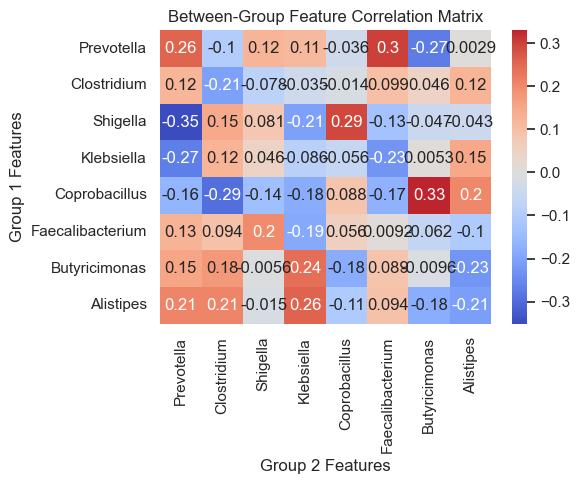

In [208]:
# Compute correlation between each feature in group1 vs each in group2
result = pd.DataFrame()

for f1 in df.columns:
    for f2 in df.columns:
        result.loc[f1, f2] = np.corrcoef(a_clr[f1], b_clr[f2])[0, 1]

result = result.astype(float)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(result, annot=True, cmap="coolwarm", center=0)
plt.title("Between-Group Feature Correlation Matrix")
plt.xlabel("Group 2 Features")
plt.ylabel("Group 1 Features")
plt.tight_layout()
plt.show()

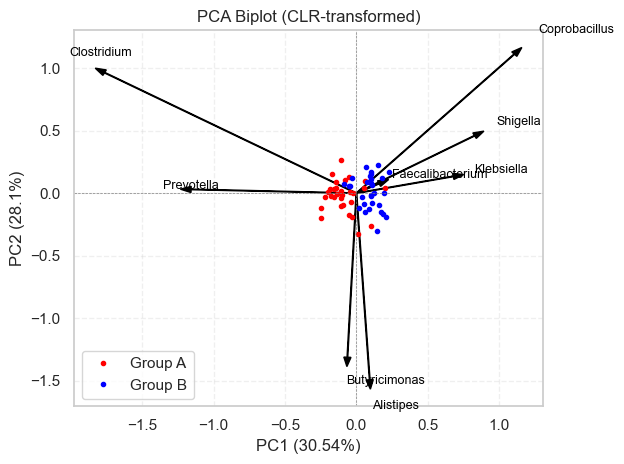

In [210]:
import matplotlib.pyplot as plt
import numpy as np

data = data_no_z
# Assuming `data` is a DataFrame
clr = pow(data / gm, 1. / np.sqrt(totvar)).coda.clr()
s, e, l = np.linalg.svd(clr)

# Scale loadings with eigenvalues
l = np.inner(e * np.identity(8), l.T[0:8, 0:8])

# Plot loadings (black arrows)
for i in range(8):
    plt.arrow(0, 0, l[0][i], l[1][i],
              color='black', width=0.005, head_width=0.05, length_includes_head=True)    
    plt.text(l[0][i]*1.1, l[1][i]*1.1, data.columns[i], color='black', fontsize=9)

# Plot sample points (red dots - group 1)
for i in range(30):
    plt.plot(s.T[0][i], s.T[1][i], 'o', color='red', ms=3, label='Group A' if i == 0 else "")

# Plot sample points (blue dots - group 2)
for i in range(30,60):
    plt.plot(s.T[0][i], s.T[1][i], 'o', color='blue', ms = 3, label='Group B' if i == 30 else "")

# Adding labels and legend
plt.xlabel(f"PC1 ({round(e[0]**2/np.sum(e**2)*100, 2)}%)")
plt.ylabel(f"PC2 ({round(e[1]**2/np.sum(e**2)*100, 2)}%)")
plt.title("PCA Biplot (CLR-transformed)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.3)

# Show legend
plt.legend()

plt.tight_layout()
plt.savefig("pca_biplot.png", dpi=300)
plt.show()


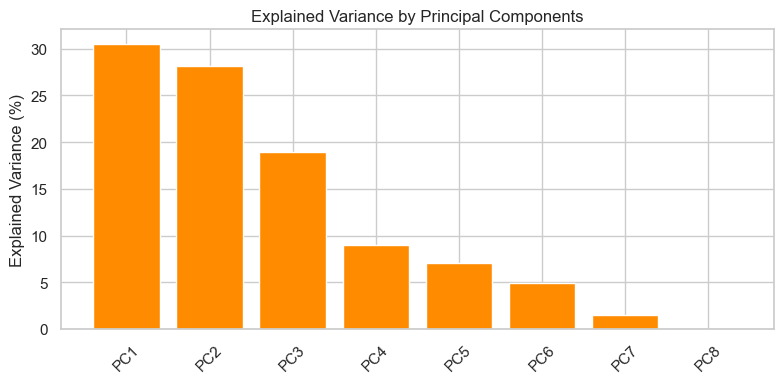

[-1.2331044  -1.82999433  0.89353482  0.75214078  1.15942218  0.22631734
 -0.0664349   0.0981185 ]


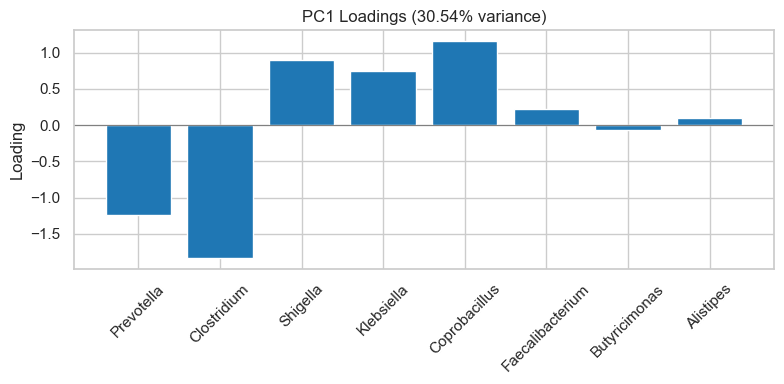

[ 0.03244034  1.00119506  0.49701745  0.1493183   1.16661581  0.10997031
 -1.38786172 -1.56869555]


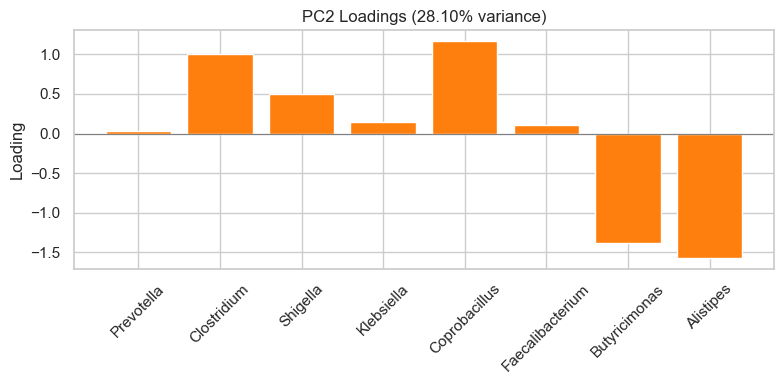

[-0.42712749  0.34881645 -0.90715591 -0.92795989  1.38566782 -0.31686758
 -0.0148059   0.8594325 ]


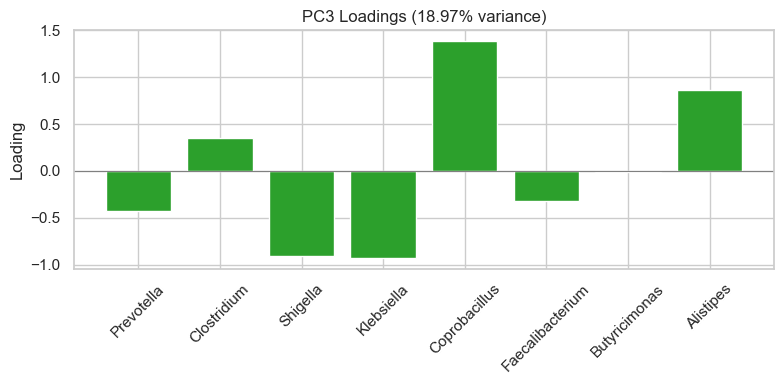

[ 0.72250964 -0.55147352 -0.04437718 -0.59447455  0.39233568  0.10836079
  0.6542733  -0.68715415]


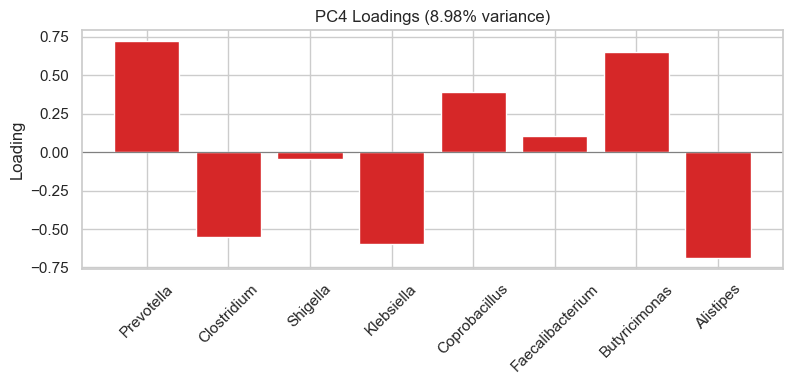

[-0.80416917  0.48306399  0.25683879 -0.18685119 -0.08157379 -0.04848013
  0.78045049 -0.399279  ]


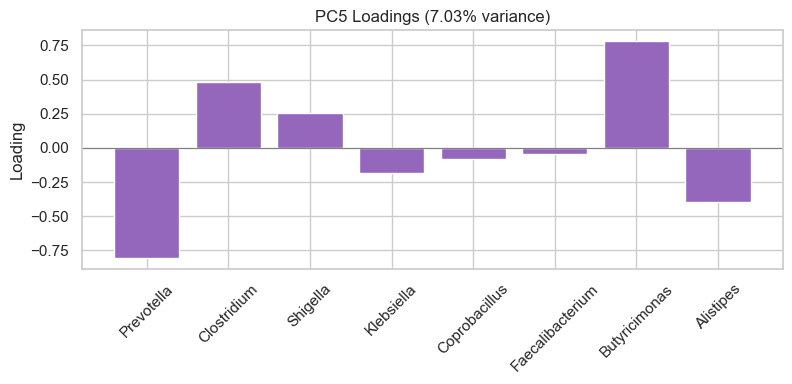

[ 0.0353585  -0.0042365   0.75814724 -0.70087015 -0.1389482   0.00998417
 -0.24569453  0.28625948]


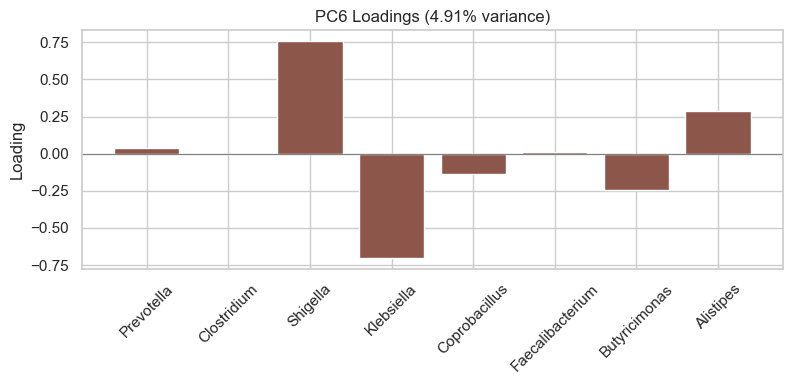

[-0.11567443 -0.01538237 -0.1434154  -0.12066476 -0.06956794  0.55508135
 -0.07302758 -0.01734887]


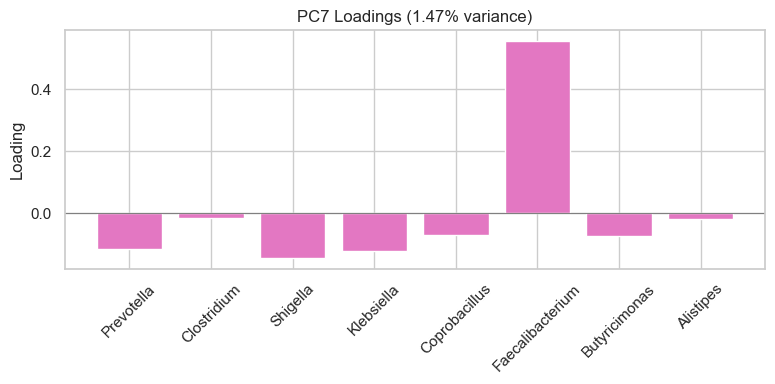

[3.25393878e-16 3.25393878e-16 3.25393878e-16 3.25393878e-16
 3.25393878e-16 3.25393878e-16 3.25393878e-16 3.25393878e-16]


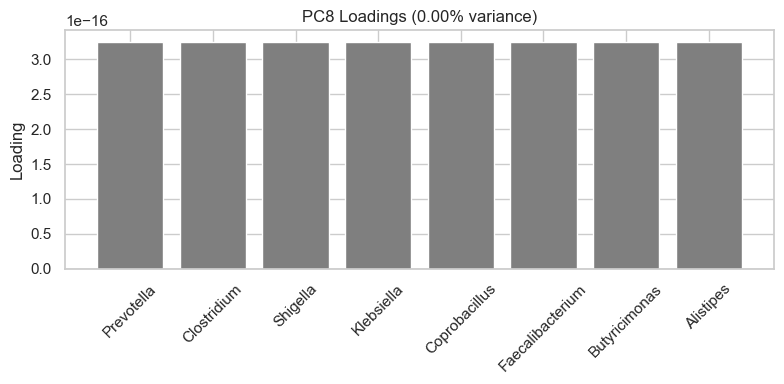

In [233]:
# Variance explained by each principal component
explained_variance = (e ** 2) / np.sum(e ** 2)  # Normalize to sum to 1
explained_variance_percent = explained_variance * 100

# Plot variance explained
plt.figure(figsize=(8, 4))
plt.bar([f'PC{i+1}' for i in range(len(e))], explained_variance_percent, color='darkorange')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot loadings for all PCs
num_pcs = l.shape[0]
for i in range(num_pcs):
    plt.figure(figsize=(8, 4))
    plt.bar(data.columns, l[i], color=plt.cm.tab10(i % 10))
    print(l[i])
    plt.axhline(0, color='gray', linewidth=0.8)
    plt.ylabel('Loading')
    plt.title(f'PC{i+1} Loadings ({explained_variance_percent[i]:.2f}% variance)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    



In [244]:
a_values = data_no_z[data_no_z.index.str.startswith("A")]
b_values = data_no_z[data_no_z.index.str.startswith("B")]

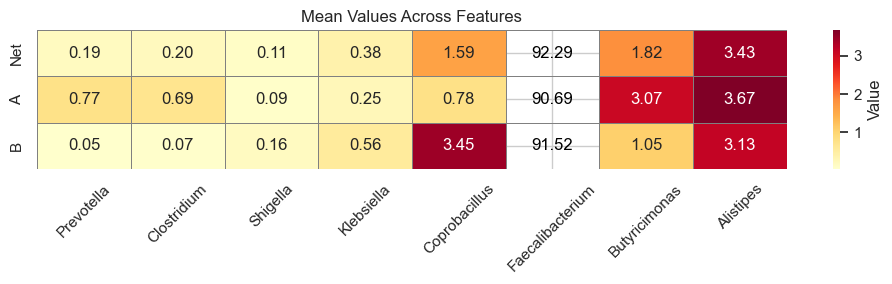

In [224]:
#sample mean of all data

net_mean = data_no_z.coda.gmean()
A_mean = a_values.coda.gmean()
B_mean = b_values.coda.gmean()

data_gmean = pd.DataFrame([net_mean, A_mean, B_mean], index=["Net", "A", "B"], columns=data_no_z.columns)
mask = np.zeros_like(data_gmean, dtype=bool)
col_to_mask = data_gmean.columns.get_loc('Faecalibacterium')
mask[:, col_to_mask] = True

# Display with heatmap-style color
plt.figure(figsize=(10, 3))
ax = sns.heatmap(data_gmean, annot=True, mask=mask, cmap="YlOrRd", cbar_kws={'label': 'Value'}, fmt=".2f", linewidths=0.5, linecolor='grey')

for i in range(data_gmean.shape[0]):
    val = data_gmean.iloc[i, col_to_mask]
    ax.text(col_to_mask + 0.5, i + 0.5, f"{val:.2f}",
            ha='center', va='center', color='black')
    
plt.title("Mean Values Across Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("gmean_values.png", dpi=300)
plt.show()

In [227]:
print(net_mean)
print(A_mean)
print(B_mean)

[ 0.18656571  0.19618549  0.10675371  0.37749331  1.59006733 92.28545416
  1.82384406  3.43363624]
[7.67921990e-01 6.94407417e-01 8.75972181e-02 2.48484935e-01
 7.75104215e-01 9.06925677e+01 3.06785307e+00 3.66606343e+00]
[4.98104975e-02 7.18975902e-02 1.63245007e-01 5.57670006e-01
 3.45036695e+00 9.15213013e+01 1.05464734e+00 3.13106131e+00]


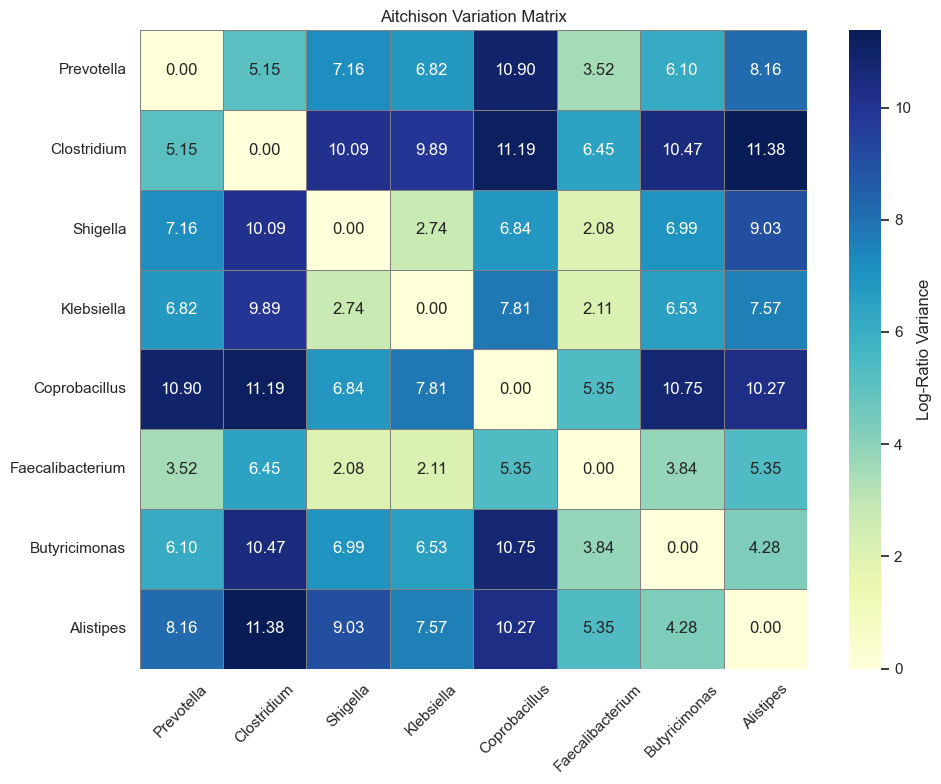

In [212]:
def aitchison_variation_matrix(df):
    """
    Computes the Aitchison variation matrix T_ij = Var[ln(x_i / x_j)]
    """
    log_df = np.log(df)
    D = df.shape[1]
    T = np.zeros((D, D))

    for i in range(D):
        for j in range(D):
            T[i, j] = np.var(log_df.iloc[:, i] - log_df.iloc[:, j])

    return pd.DataFrame(T, index=df.columns, columns=df.columns)

# Example: assuming 'data_no_z' is your input dataframe with positive values only
T = aitchison_variation_matrix(data_no_z)

# Plot the variation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.heatmap(T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, linecolor="gray", cbar_kws={'label': 'Log-Ratio Variance'})
plt.title("Aitchison Variation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("variation_matrix.png", dpi=300)
plt.show()

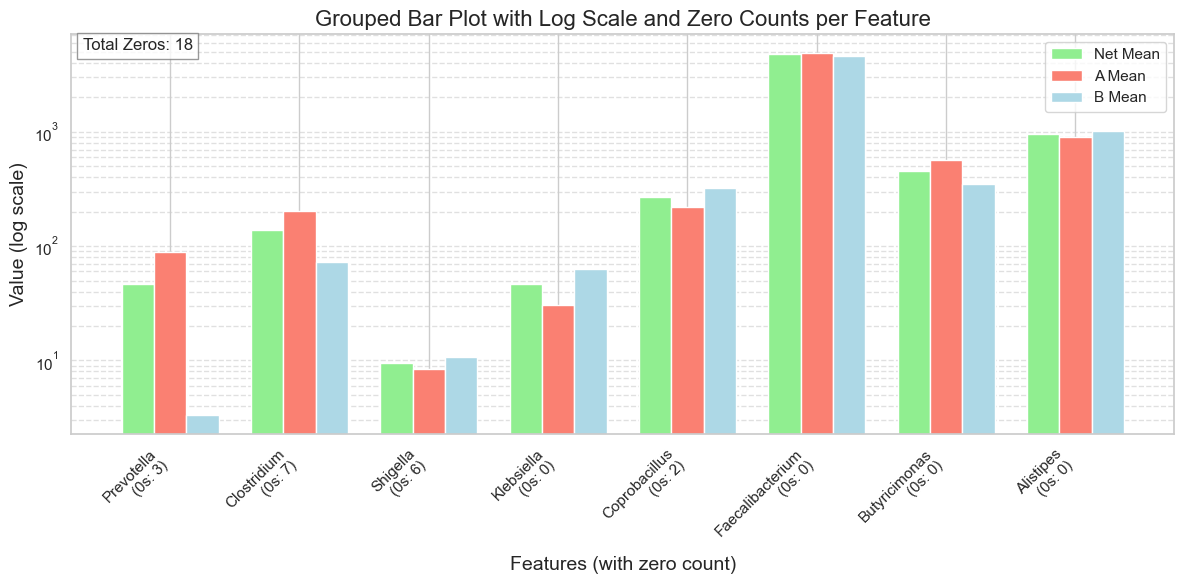

In [242]:
# Compute means
net_mean = df.mean()
A_mean = data_no_z[df.index.str.startswith("A")].mean()
B_mean = data_no_z[df.index.str.startswith("B")].mean()
x = np.arange(len(net_mean))

# Count zeros per column
zeros_per_col = (df == 0).sum()
total_zeros = zeros_per_col.sum()

# Update x-tick labels to include zero count
xtick_labels = [f"{col}\n(0s: {zeros_per_col[col]})" for col in data_no_z.columns]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - 0.25, net_mean, width=0.25, label='Net Mean', color='lightgreen')
plt.bar(x, A_mean, width=0.25, label='A Mean', color='salmon')
plt.bar(x + 0.25, B_mean, width=0.25, label='B Mean', color='lightblue')

# Y-axis in log scale
plt.yscale('log')

# Labels
plt.xlabel('Features (with zero count)', fontsize=14)
plt.ylabel('Value (log scale)', fontsize=14)
plt.title('Grouped Bar Plot with Log Scale and Zero Counts per Feature', fontsize=16)
plt.xticks(x, xtick_labels, rotation=45, ha='right')
plt.legend()
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.6)

# Total zero count box
plt.text(0.01, 0.99, f'Total Zeros: {total_zeros}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.savefig("grouped_bar_plot_with_zeros.png", dpi=300)
plt.show()

In [229]:
a_clr = a_values.coda.clr()
b_clr = b_values.coda.clr()

# Perform ANOVA on each column
anova_results = {}
for col in a_clr.columns:
    f_stat, p_value = ss.f_oneway(a_clr[col], b_clr[col])
    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(anova_results).T
print(results_df)

                  F-statistic       p-value
Prevotella          64.342995  5.639062e-11
Clostridium         12.887445  6.813272e-04
Shigella             9.581085  3.025211e-03
Klebsiella          10.754767  1.761805e-03
Coprobacillus       14.874884  2.906085e-04
Faecalibacterium     5.494357  2.252526e-02
Butyricimonas        2.222156  1.414618e-01
Alistipes            0.218439  6.419834e-01


In [245]:
balances = [
    [ 1,  1, -1, -1, -1,  0,  0,  0],  # B1: (1,2) vs (3,4,5)
    [ 1, -1,  0,  0,  0,  0,  0,  0],  # B2: 1 vs 2
    [ 1,  1,  1,  1,  1, -1, -1, -1],  # B3: (1-5) vs (6-8)
    [ 0,  0,  1, -1,  0,  0,  0,  0],  # B4: 3 vs 4
    [ 0,  0,  1,  1, -1,  0,  0,  0],  # B5: (3,4) vs 5
    [ 0,  0,  0,  0,  0,  1, -1,  0],  # B6: 6 vs 7
    [ 0,  0,  0,  0,  0,  1,  1, -1],  # B7: (6,7) vs 8
]

psi = coda.extra.norm(balances)

a_ilr = a_values.coda.ilr(psi)
b_ilr = b_values.coda.ilr(psi)

# Perform ANOVA on each column
anova_results = {}
for col in a_ilr.columns:
    f_stat, p_value = ss.f_oneway(a_ilr[col], b_ilr[col])
    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(anova_results).T
print(results_df)

   F-statistic       p-value
0    68.205059  2.260538e-11
1     0.882757  3.513442e-01
2     0.000482  9.825584e-01
3     0.000975  9.752017e-01
4     1.344982  2.509092e-01
5     4.714953  3.400513e-02
6     0.523856  4.721108e-01


/Users/ruchir/miniconda3/envs/llm_/lib/python3.13/site-packages/ternary/plotting.py:148: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



<Figure size 650x600 with 0 Axes>

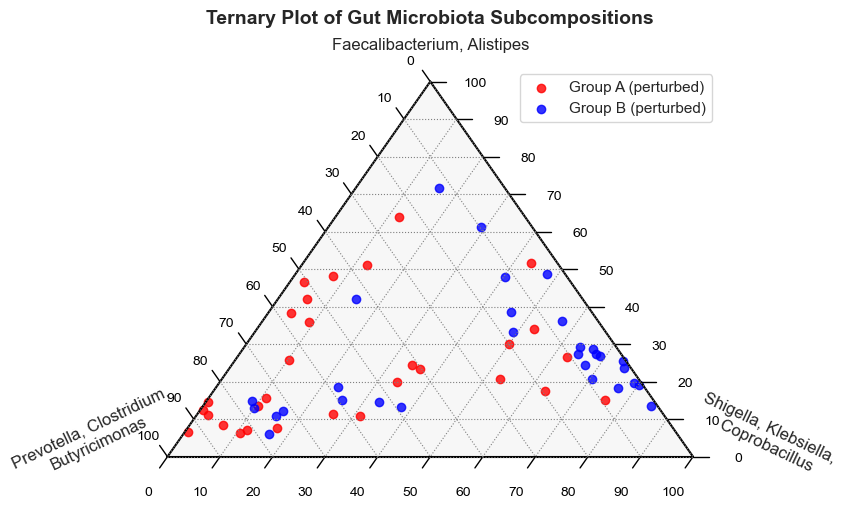

In [232]:
# Define the 3 subcomposition groups
group1 = ['Prevotella', 'Clostridium', 'Butyricimonas']
group2 = ['Shigella', 'Klebsiella', 'Coprobacillus']
group3 = ['Faecalibacterium', 'Alistipes']

# Sum taxa within each group
a_grouped = pd.DataFrame({
    'Group2': a_values[group2].sum(axis=1),
    'Group3': a_values[group3].sum(axis=1),
    'Group1': a_values[group1].sum(axis=1),
})

b_grouped = pd.DataFrame({
    'Group2': b_values[group2].sum(axis=1),
    'Group3': b_values[group3].sum(axis=1),
    'Group1': b_values[group1].sum(axis=1),
})

# Compute geometric mean of the combined dataset
combined_data = pd.concat([a_grouped, b_grouped])
gm_3part = ss.mstats.gmean(combined_data, axis=0)
s = 1 / gm_3part

# Apply perturbation and closure
data_a_pert = pd.DataFrame(closure(a_grouped.mul(s, axis=1)) * 100)
data_b_pert = pd.DataFrame(closure(b_grouped.mul(s, axis=1)) * 100)

# Create ternary plot
plt.figure(figsize=(6.5, 6))
_, tax = ternary.figure(scale=100)
tax.boundary(linewidth=1.5)
tax.ticks(axis='lbr', linewidth=1, multiple=10, offset=0.03)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

# Axis labels for groups
tax.left_corner_label("Prevotella, Clostridium,\nButyricimonas", fontsize=12, offset=0.29, rotation=30)
tax.right_corner_label("Shigella, Klebsiella,\n  Coprobacillus", fontsize=12, offset=0.29, rotation=-30)
tax.top_corner_label("Faecalibacterium, Alistipes", fontsize=12, offset=0.20)

# Plot the data
tax.scatter(data_a_pert.to_numpy(), color='red', alpha=0.8, label='Group A (perturbed)')
tax.scatter(data_b_pert.to_numpy(), color='blue', alpha=0.8, label='Group B (perturbed)')

# Add gridlines, legend, and title
tax.gridlines(multiple=10, color="gray", linestyle="dotted", linewidth=0.8)
tax.legend()
plt.tight_layout()
plt.title("Ternary Plot of Gut Microbiota Subcompositions", y=1.08, fontsize=14, fontweight='bold')
plt.savefig("ternary_simplex_plot.png", dpi=300, bbox_inches='tight')
plt.show()